In [1]:
import numpy as np
from model import EspAlgorithm
from model import visualize_metric_per_epoch
from sklearn import datasets
import torch
import pandas as pd

In [2]:
data = datasets.make_classification(n_features=5, n_samples=300, random_state=42)

In [3]:
np.random.seed(42)
ESP = EspAlgorithm(h=5, n=4, b=10, x=data[0], y=data[1], threads_num=10, mutation_rate=0.5)
history = ESP.run_alg(0.25)

5 0.6339680468533387
5 0.4351740953389115
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
4 0.43015910124911255
4 0.43015910124911255
4 0.43015910124911255
4 0.2724588403269885
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681


In [3]:
import time
times = {}
for threads_num in [2, 4, 6, 8, 10, 12]:
    print('-----------------------')
    np.random.seed(42)
    beginning_time = time.time()
    ESP = EspAlgorithm(h=5, n=4, b=10, x=data[0], y=data[1], threads_num=threads_num, mutation_rate=0.5)
    history = ESP.run_alg(0.25)
    processing_time = time.time() - beginning_time
    times[threads_num] = processing_time

-----------------------
5 0.6339680468533387
5 0.4351740953389115
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
4 0.43015910124911255
4 0.43015910124911255
4 0.43015910124911255
4 0.2724588403269885
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
4 0.2708290901982681
-----------------------
5 0.6339680468533387
5 0.4351740953389115
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.4321181307051662
5 0.

In [4]:
times

{2: 370.45398020744324,
 4: 206.5795910358429,
 6: 140.51708793640137,
 8: 110.96685314178467,
 10: 90.8617844581604,
 12: 77.22820830345154}

In [2]:
from sklearn import preprocessing
dataset = pd.read_csv('pima-indians-diabetes.data', header=None)
dataset.iloc[:, :-1] = preprocessing.normalize(dataset.iloc[:, :-1])

In [3]:
dataset

,0,1,2,3,4,5,6,7,8
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603,1
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655,1
...,...,...,...,...,...,...,...,...,...
763,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623,0
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600,0
765,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492,0
766,0.006653,0.838285,0.399184,0.000000,0.000000,0.200257,0.002322,0.312694,1


In [8]:
np.random.seed(42)
ESP = EspAlgorithm(h=5, n=5, b=10, x=dataset.iloc[:, :-1], y=dataset.iloc[:, -1], threads_num=10, mutation_rate=1.0)
history = ESP.run_alg(0.63)

5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7123614015753222
5 0.7026205470361432
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6709653189036952
5 0.644865023329592
5 0.644865023329592
5 0.644865023329592
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.635848720928

In [9]:
import time
times = {}
for threads_num in [2, 4, 6, 8, 10, 12]:
    print('-----------------------')
    np.random.seed(42)
    beginning_time = time.time()
    ESP = EspAlgorithm(h=5, n=5, b=10, x=dataset.iloc[:, :-1], y=dataset.iloc[:, -1], threads_num=threads_num, mutation_rate=1.0)
    history = ESP.run_alg(0.63)
    processing_time = time.time() - beginning_time
    times[threads_num] = processing_time

-----------------------
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7994836930097801
5 0.7123614015753222
5 0.7026205470361432
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6774727241601483
5 0.6709653189036952
5 0.644865023329592
5 0.644865023329592
5 0.644865023329592
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6423533038943101
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6417933839725487
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.6410551876143703
5 0.641055187

Text(0, 0.5, 'Затраченное на выполнение время, с.')

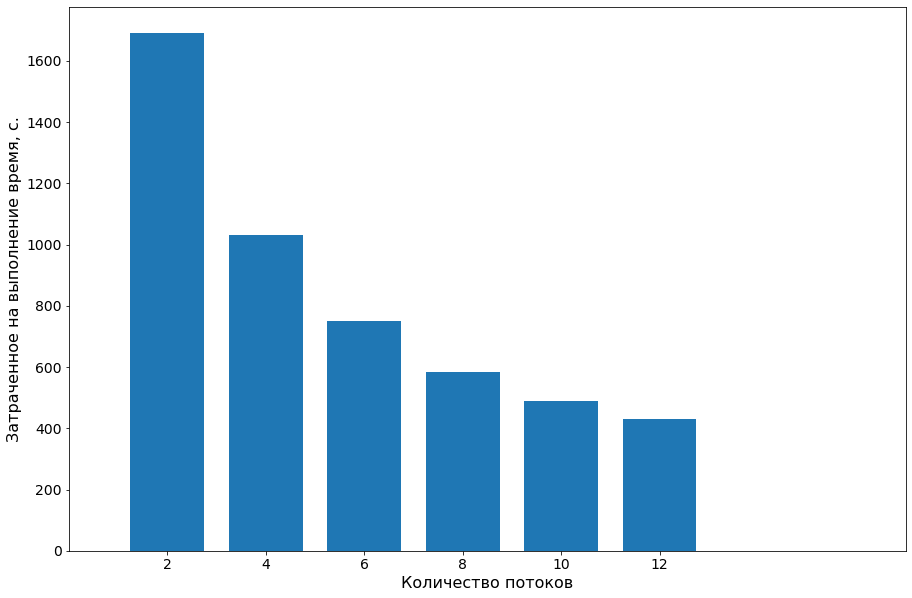

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(times.keys(), height=times.values(), width=1.5, align='center')
ax.set(xticks=[2, 4, 6, 8, 10, 12], xlim=[0, 17])
ax.set_xlabel('Количество потоков')
ax.set_ylabel('Затраченное на выполнение время, с.')
# ax.set_yticks(np.arange(0.0, np.round(max(threads_execution_times.values())), 0.5))
# ax.set_ylim(0, np.round(max(threads_execution_times.values())))

In [14]:
times

{2: 1690.3102912902832,
 4: 1030.0984547138214,
 6: 748.9972522258759,
 8: 585.12610912323,
 10: 489.00648164749146,
 12: 429.0069999694824}

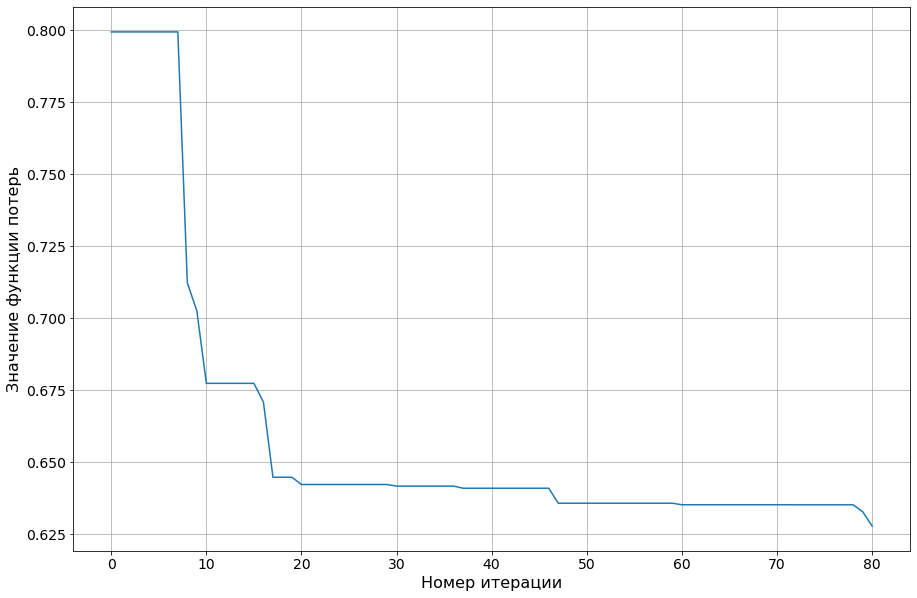

In [11]:
visualize_metric_per_epoch(history['loss'], 'loss')

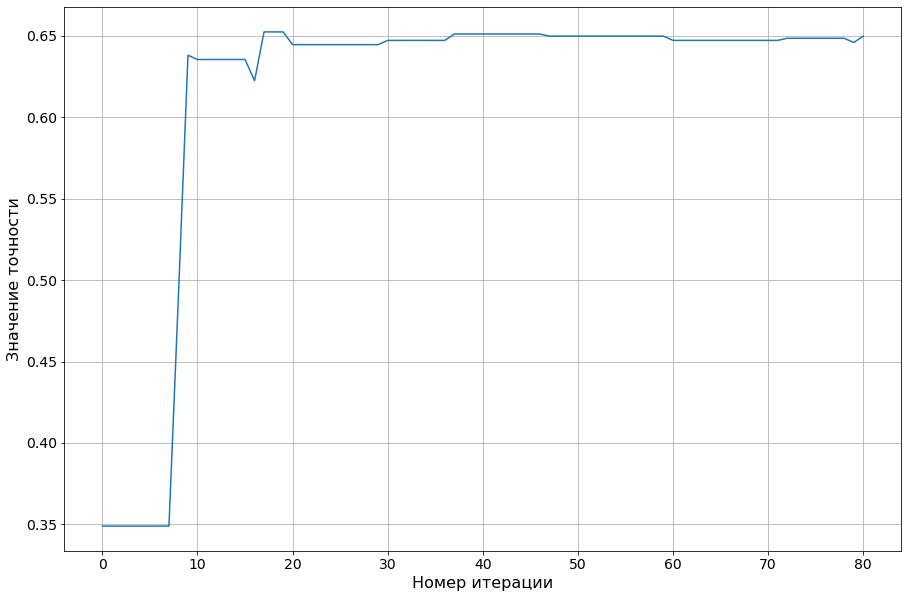

In [12]:
visualize_metric_per_epoch(history['accuracy'], 'accuracy')

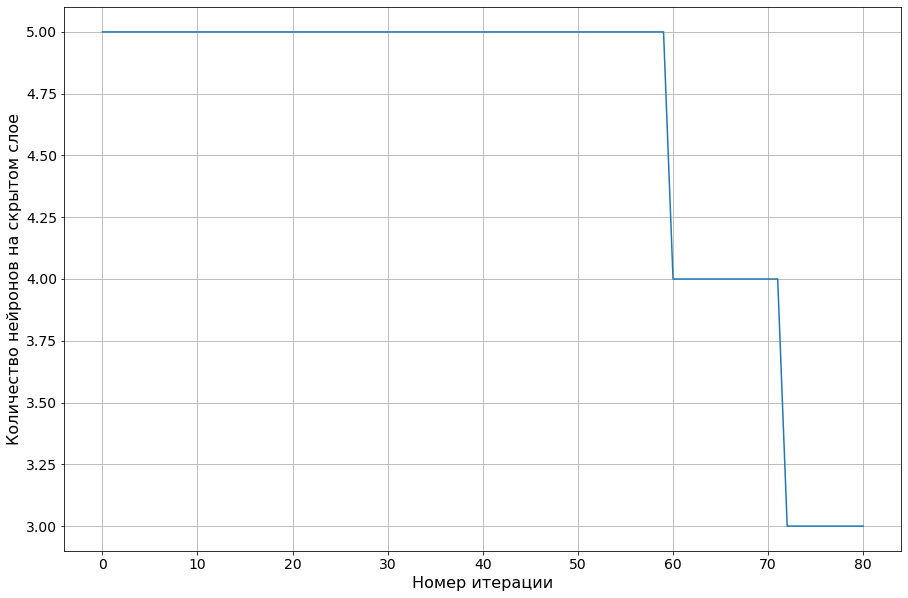

In [13]:
visualize_metric_per_epoch(history['models_hidden_size'], 'hidden')

In [20]:
max(history['accuracy'])

0.7317708333333334

In [21]:
history['loss'][np.argmax(history['accuracy'])]

0.5758798014525327

In [6]:
a[-0]

array([1.36346104, 1.49698506, 1.54484482])

In [3]:
dataset = pd.read_csv('pima-indians-diabetes.data', header=None)
dataset.columns = ['times_pregnant',
                   'Plasma glucose concentration',
                   'Diastolic blood pressure',
                   'Triceps skin fold thickness',
                   '2-Hour serum insulin',
                   'Body mass index',
                   'Diabetes pedigree function',
                   'Age',
                   'class']
dataset

,times_pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
max(history['accuracy']), history['loss'][np.argmax(history['accuracy'])], history['models_hidden_size'][np.argmax(history['accuracy'])]

(0.6966145833333334, 0.612959147001438, 11)

In [9]:
a = np.random.rand(5, 3, 7)

In [12]:
np.insert(a,
          [0],
          np.random.rand(5, 3, 1), axis=2)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [53]:
import numpy as np
a = np.array([[1,2,3], [4,5,6]])

In [54]:
indexes = np.random.randint(1, 3, 2)

In [55]:
print(np.transpose(indexes))

[2 2]


In [63]:
a[np.arange(len(a)), indexes] += 1

In [64]:
a

array([[1, 2, 4],
       [4, 5, 7]])

In [14]:
import numpy as np

In [18]:
a = np.array([[[1,2,3], [4,5,6], [7,8,9]],
              [[1,2,3], [4,5,6], [7,8,9]]])
b = np.array([[0.5, 0.1, 0.2],
              [0.5, 0.1, 0.2]])

In [34]:
np.take_along_axis(a, np.expand_dims(np.argsort(b, axis=1), axis=2), axis=1)

array([[[4, 5, 6],
        [7, 8, 9],
        [1, 2, 3]],

       [[4, 5, 6],
        [7, 8, 9],
        [1, 2, 3]]])

In [33]:
a.shape, np.expand_dims(np.argsort(b, axis=1), axis=2).shape

((2, 3, 3), (2, 3, 1))